In [4]:
#загрузка необходимых библиотек
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers import Rescaling, Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from keras.applications.resnet50 import ResNet50

In [5]:
#функция построения графиков ошибки и точности в зависимости от эпох
def check_metrics(history, figure_name):
      train=history.history[f'{figure_name}']
      val = history.history[f'val_{figure_name}']

      epochs = range(1, len(train)+1)
      plt.plot(epochs, train, 'b', label = f'Training {figure_name}')
      plt.plot(epochs, val, 'b', label = f'Validation {figure_name}', color = 'green')
      plt.title(f'Training and Validation {figure_name}')
      plt.xlabel('Epochs')
      plt.ylabel(f'{figure_name}')
      plt.legend()
      plt.show()


In [6]:
#импорт тренировочной части датасета
train_ds = tf.keras.utils.image_dataset_from_directory(r'D:\work_work\tasks\modul_3\dataset\train', validation_split=0.2,  subset='training', seed = 123, image_size=(128, 128), batch_size= 128)
#импорт валидационной части датасета
val_ds = tf.keras.utils.image_dataset_from_directory(r'D:\work_work\tasks\modul_3\dataset\test', validation_split=0.2,  subset='validation', seed = 123, image_size=(128, 128), batch_size= 128)

Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Found 1184 files belonging to 2 classes.
Using 236 files for validation.


In [7]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Модель полносвязной нейронной сети без использования сверточных слоев

In [8]:
fcc_nn = Sequential()
#нормализация данных
fcc_nn.add(Rescaling(1./255))
fcc_nn.add(Flatten(input_shape=(128,128)))
fcc_nn.add(Dense(16, activation='relu'))
fcc_nn.add(BatchNormalization())
fcc_nn.add(Dense(32, activation='relu'))
fcc_nn.add(BatchNormalization())
fcc_nn.add(Dense(64, activation='relu'))
fcc_nn.add(Dense(16, activation='relu'))
#выходной слой
fcc_nn.add(Dense(1, activation='sigmoid')) 
#компиляция модели
fcc_nn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#обучение модели
history = fcc_nn.fit(train_ds, epochs = 25, batch_size= 32, validation_data = val_ds)

#оценка качества модели
test_loss, test_acc = fcc_nn.evaluate (val_ds)
print('Test accuracy', test_acc)


Epoch 1/25


c:\Users\berse\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.5936 - loss: 0.6734 - val_accuracy: 0.6144 - val_loss: 1.2719
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7025 - loss: 0.5576 - val_accuracy: 0.6102 - val_loss: 0.9318
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7747 - loss: 0.4743 - val_accuracy: 0.6229 - val_loss: 0.9285
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7971 - loss: 0.4359 - val_accuracy: 0.6314 - val_loss: 0.6484
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8349 - loss: 0.3794 - val_accuracy: 0.5932 - val_loss: 0.7028
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8519 - loss: 0.3477 - val_accuracy: 0.6780 - val_loss: 0.6217
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8808 - loss: 0.3004 - val_accuracy: 0.6059 - val_loss: 0.6834
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8990 - loss: 0.2522 - val_accuracy: 0.6822 - val_loss: 0

C:\Users\berse\AppData\Local\Temp\ipykernel_11028\2414695453.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val, 'b', label = f'Validation {figure_name}', color = 'green')


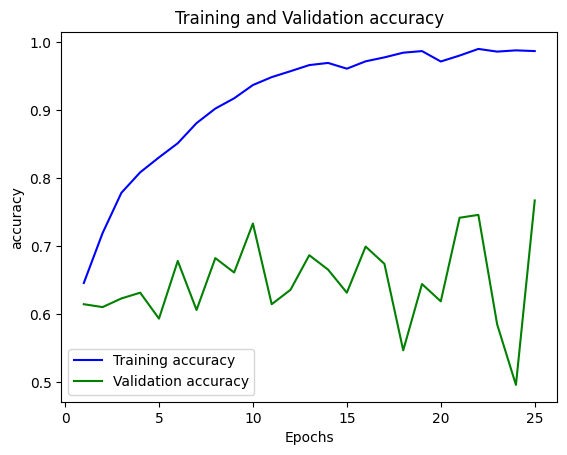

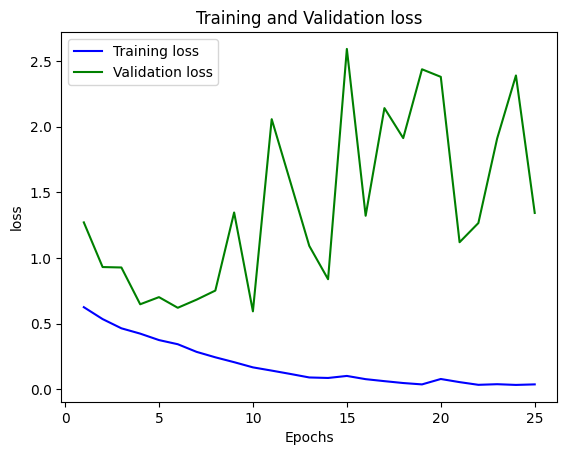

In [9]:
check_metrics(history, 'accuracy')
check_metrics(history, 'loss')

При использовании полносвязной нейронной сети без применения регуляризации метрика accuracy > 85% достигалась только при сложной архитектуре нейронной сети в 6 слоев со слоями в 1024, 512, 216, 128, 64, 32 нейрона и достигалось только на 30 эпохе. С применением BatchNormalization показатели метрики резко возросли и стали достигать 97% при использовани  гораздо более простой архитектуры нейронной сети, уменьшилось время, необходимое на обучение. Однако показатели на валидационной выборке не улучшились, достигали максимум 78% accuracy и показатели метрики были скачкообразными. Наилучшее значение метрики наблюдалось в районе 5-10 эпохи.

Обучение с помощью сверточной нейронной сети

In [10]:
conv_nn = Sequential()
#первый слой нейронной сети
conv_nn.add(Rescaling(1./255))
conv_nn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (128, 128, 3)))
conv_nn.add(Conv2D(32, (3, 3), activation='relu'))
#conv_nn.add(Conv2D(64, (3, 3), activation='relu'))
conv_nn.add(MaxPooling2D(pool_size=(2, 2)))
conv_nn.add(Flatten())
conv_nn.add(Dense(128, activation='relu'))
conv_nn.add(Dense(1, activation='sigmoid'))
#компиляция модели
conv_nn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#обучение модели
history_conv = conv_nn.fit(train_ds, epochs = 15, batch_size= 32, validation_data = val_ds)

#оценка качества модели
test_loss, test_acc = conv_nn.evaluate (val_ds)
print('Test accuracy', test_acc)


Epoch 1/15


c:\Users\berse\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5824 - loss: 2.5137 - val_accuracy: 0.7966 - val_loss: 0.4530
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 994ms/step - accuracy: 0.8210 - loss: 0.3997 - val_accuracy: 0.8390 - val_loss: 0.3710
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8837 - loss: 0.2876 - val_accuracy: 0.8432 - val_loss: 0.3542
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9233 - loss: 0.2115 - val_accuracy: 0.8475 - val_loss: 0.3591
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 995ms/step - accuracy: 0.9537 - loss: 0.1403 - val_accuracy: 0.8559 - val_loss: 0.4163
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9701 - loss: 0.1013 - val_accuracy: 0.8432 - val_loss: 0.4457
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9907 - loss: 0.0480 - val_accuracy: 0.8517 - val_loss: 0.5465
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9942 - loss: 0.0329 - val_accuracy: 0.8432 - val_loss: 0.54

C:\Users\berse\AppData\Local\Temp\ipykernel_11028\2414695453.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val, 'b', label = f'Validation {figure_name}', color = 'green')


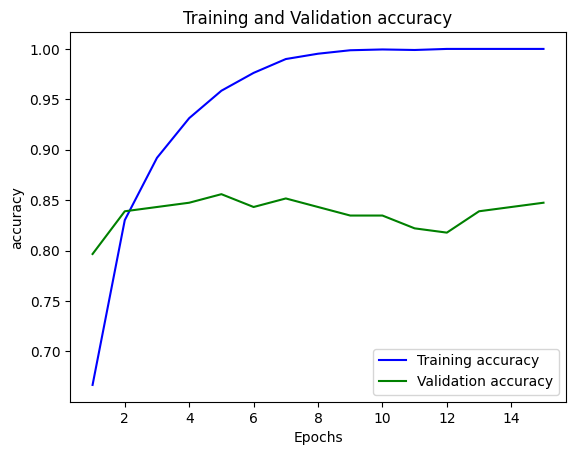

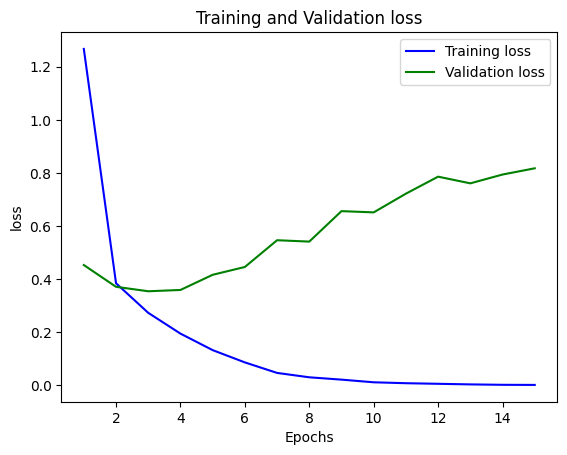

In [11]:
check_metrics(history_conv, 'accuracy')
check_metrics(history_conv, 'loss')

При использовании сверточной нейронной сети получилось достигнуть значения метрики accuracy = 1 на обучающей выборке, на тестовой вышло наилучшее значение 0.8771, при этом метрика на 2-15 эпохе не падала ниже 0.8305 для валидационной выборке и на 5 эпохах была больше 85%. После 8 эпохи модель переобучилась. Наибольший прирост к качеству дал препроцессинг изображений Rescaling. При применении BatchNormalization сильно упало качество на валидационной части датасета. Наилучшее качество наблюдалось при размере изображений (128, 128, 3)

Обучение на основе архитектуры Resnet50

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.7153 - loss: 4.0581 - val_accuracy: 0.9746 - val_loss: 0.0904
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9656 - loss: 0.0871 - val_accuracy: 0.9746 - val_loss: 0.0717
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9813 - loss: 0.0483 - val_accuracy: 0.9788 - val_loss: 0.0599
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9889 - loss: 0.0314 - val_accuracy: 0.9831 - val_loss: 0.0518
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9924 - loss: 0.0201 - val_accuracy: 0.9746 - val_loss: 0.0468
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.9788 - val_loss: 0.0412


C:\Users\berse\AppData\Local\Temp\ipykernel_11028\2414695453.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val, 'b', label = f'Validation {figure_name}', color = 'green')


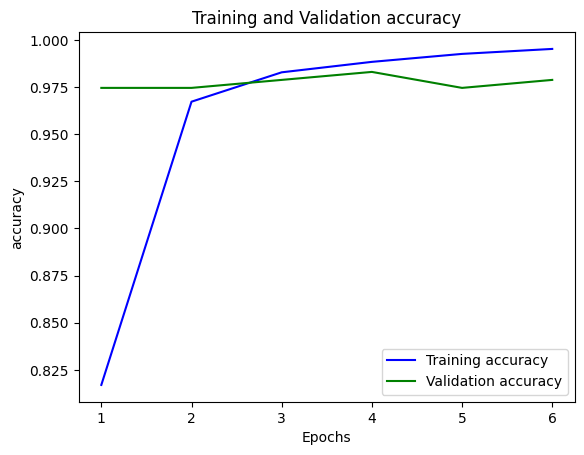

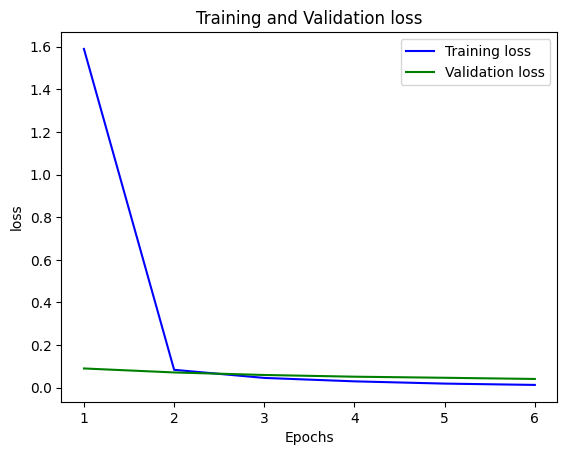

In [12]:
resnet_base = Sequential()
res_base = ResNet50(weights='imagenet', include_top = False, input_shape=(128, 128, 3))
res_base.trainable = False
resnet_base.add(res_base)
resnet_base.add(Flatten())
resnet_base.add(Dense(64, activation='relu'))
resnet_base.add(Dense(1, activation='sigmoid'))
resnet_base.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_base = resnet_base.fit(train_ds, epochs = 6, batch_size= 32, validation_data = val_ds)
check_metrics(history_base, 'accuracy')
check_metrics(history_base, 'loss')

В качестве модели для Transfer Learning была применена модель ResNet50, в которой были заморожены все скрытые слои и добавлены один дополнительный скрытый и один выходной слой. Показатели метрики на всех эпохах превыышали 97% , наилучший результат был получен на 4 эпохе.

**Вывод**: наилучшие результаты получилось при использовании Transfer Learning, также необходимая метрика была получена с помощью сверточной нейронной сети с использованием 2 сверточных слоев при применении нормализации изображений в начале, получить необходимое значение меетрики с помощью полносвязной нейронной сети не удалось. При выполнении работы использовался входной размер изображений (128, 128, 3). Сильный прирост качества дало применение сверточных слоев и предобученной модели. 